<div class="titre-notebook" style="font-size:36px; text-align:center; font-weight:bold; background-color:#f1f1f1; padding:0.01em 16px; margin: 16px auto;">
CN2 - Estimation d'incertitudes avec python
</div>

Pour traiter les données et les représenter, nous utiliserons les modules `numpy` et `matplotlib.pyplot`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Estimation de type A (plusieurs mesures qui donnent des résultats différents) 

## Rappels théoriques

<div class="myalertblock" style="background-color:#ffdddd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

On considère une série de $N$ mesures $X_i$ d'une grandeur $X$ réalisées selon un protocole identique. Le résultat est:
$$\displaystyle \boxed{X = \overline{X} \pm \frac{s(X)}{\sqrt{N}}} \quad
\begin{cases}
\displaystyle
\overline{X} = \dfrac{1}{N}\sum_{i=0}^N X_i \text{ moyenne des mesures} \\
s(X) =\sqrt{\displaystyle\frac{1}{N-1}\sum_{i=1}^N \left(X_i-\overline{X}\right)^2} \text{ écart-type expérimental des mesures}
\end{cases}
$$
</div>

## Calcul avec python

Le module `numpy` permet de calculer la moyenne et l'écart-type expérimental d'une série de mesures, à condition de la dans un tableau type `array`.

- `np.mean(tab)` renvoie la moyenne d'une série de mesures stockées dans le tableau `tab`
- `np.std(tab,ddof=1)` renvoie l'écart-type expérimental des mesures stockées dans le tableau `tab`. 
- Attention, par défaut, `np.std(tab)` renvoie l’écart-type $\sigma(X) = \sqrt{\frac{1}{N}\sum_{i=1}^N \left(X_i-\overline{X}\right)^2}$ qui est différent de $s(X)$ même si la différence entre les deux valeurs est faible dès que $N>5$.

<div class="myexampleblock" style="background-color:#ddffdd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

#### Exercice 1
On considère une série de mesures de la célérité du son dans l'air réalisées selon un protocole identique. Compléter le code ci-dessous pour déterminer le résultat de la mesure et son incertitude associée.
</div>

In [2]:
mesures_c = np.array([343.8, 339.2, 343.0, 343.9, 340.5, 335.8, 344.3, 341.0, 346.5, 337.9])

# Estimation de type B (mesure unique ou qui donnent toujours le même résultat)

## Rappels théoriques

Lorsque qu'il est impossible (*pas de variabilité observée de la mesure*), ou trop long, de faire une évaluation de type A, l'incertitude est alors évaluée à l'aide de **connaissances préalables sur le dispositif** expérimental.

Dans beaucoup de cas, il est possible d'estimer **le plus petit intervalle dans lequel on est certain trouver toutes les valeurs possibles de** $X$. On note $X_\text{c}$ la valeur centrale de cet intervalle. En l'absence d'autre information sur la variabilité, on attribue une **loi de probabilité uniforme rectangulaire** à la mesure (équiprobabilité des mesures dans l'intervalle de largeur $2\Delta$) et on calcule l'écart-type de la distribution rectangulaire de demi largeur $\Delta$ :
$$u(X) = \frac{\Delta}{\sqrt{3}}$$

loi de probabilité uniforme

<div class="myalertblock" style="background-color:#ffdddd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">
   
-  **La valeur mesurée est la valeur centrale de l'interval des valeurs possibles**
   $\boxed{\overline{X} = X_\text{c}}$

-  **L’incertitude sur une mesure de type B est la demi-largeur de l'interval des valeurs possibles divisée par $\sqrt{3}$**:
   $$\boxed{u(X) = \frac{\Delta}{\sqrt{3}}}$$
   Trois cas de figure pour déterminer la demi-largeur $\Delta$

   1. $\Delta$ est fournie par le constructeur de l'appareil (notice de l'appareil)

   2. **Pour un instrument gradué $\Delta$ est égale à une graduation (ou une demi-graduation si on est très soigneux)**

   3. $\Delta$ est estimé directement par l'expérimentateur
</div>

## Calcul avec python

Calcul immédiat une fois que l'on a déterminer la demi-largeur $\Delta$.

<div class="myexampleblock" style="background-color:#ddffdd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

#### Exercice 2
On a mesuré la position $d$ d’un écran sur un banc optique pour laquelle se forme l’image d’un objet par l’intermédiaire d’une lentille convergente. L’image semble bien nette pour des positions allant de 29,7 à 30,5 cm. Exprimer le résulat de cette mesure avec incertitude.
</div>

In [ ]:
# Votre code pour l'exercice 2


# Incertitudes composées

Très souvent, la mesure expérimentale n’est pas le résultat recherché de l’expérience. Il faut souvent combiner des mesures entre elles pour **calculer** le résultat souhaité.

## Cas simples: sommes, différences, produits, quotients.

<div class="myalertblock" style="background-color:#ffdddd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

Pour une grandeur $Y$ calculée à partir de 2 grandeurs $X_1$ et $X_2$:

- $\boxed{Y = X_1 \pm X_2 \quad \Rightarrow \quad u(Y) = \sqrt{(u(X_1))^2 +(u(X_2)))^2}}$
- $\boxed{Y = X_1^{\alpha_1} X_2^{\alpha_2} \quad \Rightarrow \quad \frac{u(Y)}{Y} = \sqrt{|\alpha_1|\left(\frac{u(X_1)}{X_1}\right)^2 +|\alpha_2|\left(\frac{u(X_2)}{X_2}\right)^2 }}$
</div>
Le calcul en python est immédiat.

<div class="myexampleblock" style="background-color:#ddffdd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

#### Exercice 3
Exprimer le résulat des calculs ci-dessous avec incertitude.
    
1. calcul de la distance $L$ entre deux points mesurés sur un banc optique ($11,1$ cm et $24,8$ cm) avec une précision $\Delta=0,5$ cm.
2. calcul de la célérité $c$ du son avec une fréquence $f=40983 \pm 94$ Hz et une longueur d'onde $\lambda = 0,840 \pm 0,041$ cm.
</div>

In [ ]:
# Votre code pour l'exercice 3


## Cas plus complexes: simulation de Monte-Carlo avec loi uniforme

On considère le cas simple du calcul de la distance $d = |B - A|$ entre 2 postions ($A=11,1$ cm et $B=19,5$ cm) mesurées avec une précision $\Delta=0.5$ cm.

- Nous allons faire varier aléatoirement les grandeurs $A$ et $B$ selon une **loi de probabilité uniforme rectangulaire** de demi-largeur $\Delta$, simulée grâce à la fonction `np.random.uniform`.
- Pour chacun des $N$ tirages de $A$ et $B$, calculer la valeur de  $d$ correspondante. 
- La meilleur estimation de $d$ sera la moyenne des $N$ valeurs calculées 
- L'incertitude $u(d)$ sur cette moyenne sera l'écart-type expérimental des $N$ valeurs calculées.


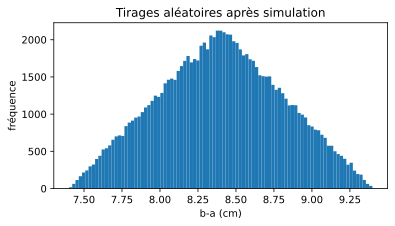

Moyenne simulation = 8.397682819453948
Incertitude-type simulation = 0.4073896464690335


In [3]:
# Mesure et précision
A = 11.1 # cm
DeltaA = 0.5 # cm
B = 19.5 # cm
DeltaB = 0.5 # cm

N = 100000 # Nombre de simulations

# Construction liste des valeurs simulées
Difference = []
for i in range(0,N):
    a = np.random.uniform(A-DeltaA,A+DeltaA) 
    b = np.random.uniform(B-DeltaB,B+DeltaB)
    Difference.append(b-a)

# Histogramme des valeurs simulées
plt.figure(figsize=(6,3))
plt.hist(Difference,bins = 'rice')
plt.title('Tirages aléatoires après simulation')
plt.xlabel("b-a (cm)")
plt.ylabel('fréquence')
plt.show()

# Calcul et affichage moyenne et écart type
moy_sim = np.mean(Difference)
u_sim = np.std(Difference,ddof=1)

print("Moyenne simulation =", moy_sim)
print("Incertitude-type simulation =", u_sim)

In [4]:
# Comparaison avec la formule
uA = DeltaA / np.sqrt(3) # évaluation type B
uB = DeltaB / np.sqrt(3)
ecart = B - A
uDiff= np.sqrt(uA**2 + uB**2)
print("Calcul direct de d = ", ecart)
print("Incertitude type formule = ", uDiff)

Calcul direct de d =  8.4
Incertitude type formule =  0.4082482904638631


Le calcul direct et la simulation de Monte-Carlo donnent le même résultat: $d = B-A = 8,40 \pm 0,41$ cm.

<div class="myalertblock" style="background-color:#ffdddd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

Estimation par simulation de Monte-Carlo d'une incertitude sur une grandeur calculée $y=f(x_i)$:

- on réalise un **grand nombre ($N>10^4$) de tirages aléatoires** selon des **loi de probabilité uniforme** (sauf mention contraire du sujet) de demi-largeur la précision $\Delta(x_i)$ des mesures $x_i$ grâce à la fonction `np.random.uniform(x_i-Delta,x_i+Delta)`.
- La meilleur estimation de la grandeur calculée $y=f(x_i)$ sera la moyenne des $N$ valeurs calculées
- L'incertitude associée $u(y)$ sera l'écart-type expérimental des $N$ valeurs calculées.
</div>

<div class="myexampleblock" style="background-color:#ddffdd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

#### Exercice 4
On cherche à estimer la distance focale $f'$ d'une lentille en mesurant la position de l'objet $\overline{OA} = - 15$ cm (précision de la mesure $\Delta(\overline{OA})= 0,5$ cm) et celle de l'image $\overline{OA'} = 30$ cm (précision de la mesure $\Delta({OA'})=3$ cm), grâce à la formule de conjugaison de Descartes.
$$ \frac{1}{\overline{OA'}} - \frac{1}{\overline{OA'}} = \frac{1}{f'}$$
Par simulation de Monte-Carlo, estimer $f'$ l'incertitude $u(f')$ associée.
</div>


In [ ]:
# Votre code pour l'exercice 4


## Simulation de Monte-Carlo avec une loi non-uniforme

Lorsque les grandeurs mesurées ont des incertitudes-types qui on été évaluées par des méthodes de type A, il est souvent plus pertinent de considéter une loi de probabilité normale :
$$p(X) = \frac{1}{\sqrt{2\pi}u(X)} e^{\dfrac{-(X-X_c)^2}{2u(X)^2}}$$
Il s’agit d’une courbe en cloche, de moyenne $X_c$ (qui est aussi la valeur la plus probable) et de d’écart-type $u(X)$.

Loi de probabilité normale

Prenons l'exemple de la mesure de la longueur d’onde de la raie verte du mercure à l’aide d’un goniomètre à réseau réglé sous incidence normale, on détermine les positions angulaires $x$ du faisceau émergent et $y$ du faisceau incident. Pour un réseau comptant $N = 3\times 10^5$ traits/m, la formule du réseau permet de déterminer la longueur d’onde $\lambda$ du faisceau:
$$\lambda = \frac{\sin(x-y)}{N} $$
On a mesuré $x= 199,80^\circ \pm 0,042^\circ$ et $y= 190,42^\circ \pm 0,031^\circ$.

La fonction `np.random.normal(m, u, N)` retourne un tableau de $N$ valeurs déterminer selon une loi normale de moyenne $m$ et d'écart-type $u$.

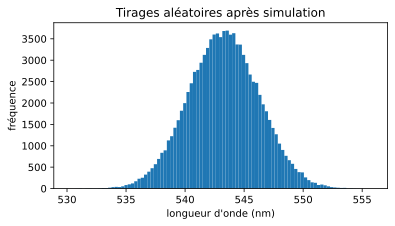

valeur calculée de longeur d'onde : 5.432758165333717e-07
incertitude-type : 3.0003544470818582e-09


In [5]:
def longueur_onde(x,y):
    N = 3e5
    return np.sin(np.radians(x-y))/N

x = 199.80
u_x = 0.042
y= 190.42,
u_y = 0.031

n_sim = 10**5
tableau_x = np.random.normal(x,u_x,n_sim)
tableau_y = np.random.normal(y,u_y,n_sim)
tableau_longueur_onde = longueur_onde(tableau_x,tableau_y)

# Histogramme des valeurs simulées
plt.figure(figsize=(6,3))
plt.hist(1e9 * tableau_longueur_onde,bins = 'rice')
plt.title('Tirages aléatoires après simulation')
plt.xlabel("longueur d'onde (nm)")
plt.ylabel('fréquence')
plt.show()

print("valeur calculée de longeur d'onde :", np.mean(tableau_longueur_onde))
print("incertitude-type :", np.std(tableau_longueur_onde, ddof=1))

Le résultat est donc: $\lambda = 543 \pm 3$ nm.